Задача 4


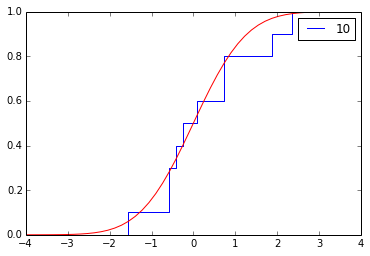

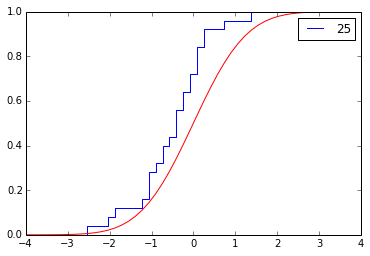

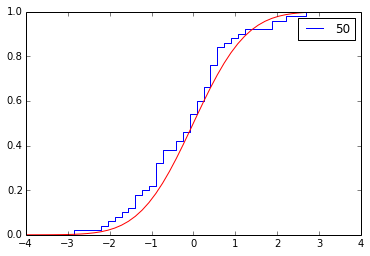

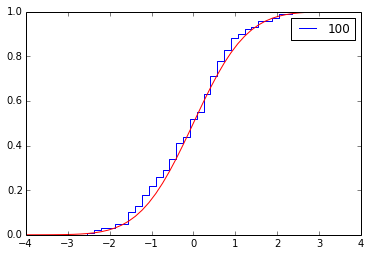

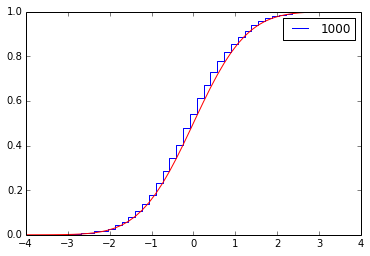

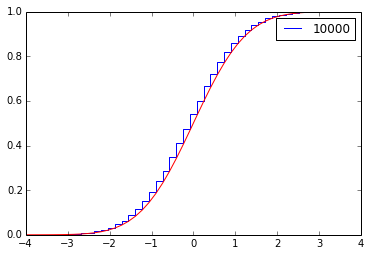

In [2]:
%matplotlib inline

from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

SHAPE = 4
GAMMA = 0.5
VARIANCE = 2.0 / 9

def generate(N):
    return norm.rvs(size=N)

def draw_ecdfs(sizes):
    for s in sizes:
        sample = generate(s)
        ecdf = ECDF(sample)
        x = np.linspace(-4, 4)
        y = ecdf(x)
        plt.step(x, y, label=str(s))
        plt.plot(x, norm.cdf(x), color="red")
        plt.legend()
        plt.show()

draw_ecdfs([10, 25, 50, 100, 1000, 10000])

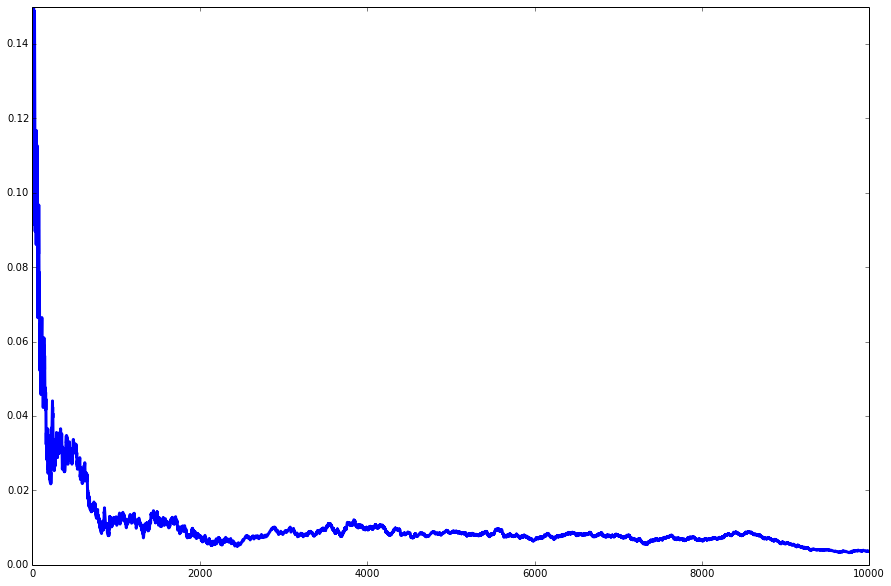

In [3]:
def calc_d(sample):
    result = []
    for i in range(len(sample)):
        s = sample[:i+1]
        x = np.linspace(-4, 4)
        ecdf = ECDF(s)
        result.append(max(np.abs(ecdf(x) - norm.cdf(x))))
    return result

def draw_d(d):
    plt.figure(figsize=(15,10))
    plt.axis([0, len(d), 0, 0.15])
    plt.plot(range(len(d)), d, color='blue', linewidth=3)
    plt.show()

draw_d(calc_d(generate(10000)))
